# 🎓 The Effects of Socioeconomic Factors on Educational Outcomes 🎒

**Using Numerical and Text Based Features About Schools in New York City to Discover Socioeconomic Disparities and Features Which Affect the Educational Outcome of Students from the Schools Measured through SAT scores**

Methods: Feature Importance, Regression Analysis, Exploratory Data Analysis


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("scores.csv")

# Exploratory Data Analysis

In [2]:
for x in df:
    print(f"Feature Name: {x}, Feature Type: {df[x].dtype}")

Feature Name: School ID, Feature Type: object
Feature Name: School Name, Feature Type: object
Feature Name: Borough, Feature Type: object
Feature Name: Building Code, Feature Type: object
Feature Name: Street Address, Feature Type: object
Feature Name: City, Feature Type: object
Feature Name: State, Feature Type: object
Feature Name: Zip Code, Feature Type: int64
Feature Name: Latitude, Feature Type: float64
Feature Name: Longitude, Feature Type: float64
Feature Name: Phone Number, Feature Type: object
Feature Name: Start Time, Feature Type: object
Feature Name: End Time, Feature Type: object
Feature Name: Student Enrollment, Feature Type: float64
Feature Name: Percent White, Feature Type: object
Feature Name: Percent Black, Feature Type: object
Feature Name: Percent Hispanic, Feature Type: object
Feature Name: Percent Asian, Feature Type: object
Feature Name: Average Score (SAT Math), Feature Type: float64
Feature Name: Average Score (SAT Reading), Feature Type: float64
Feature Name: 

In [3]:
print(df.isnull().sum())
print(df.shape)

School ID                       0
School Name                     0
Borough                         0
Building Code                   0
Street Address                  0
City                            0
State                           0
Zip Code                        0
Latitude                        0
Longitude                       0
Phone Number                    0
Start Time                      4
End Time                        4
Student Enrollment              7
Percent White                   7
Percent Black                   7
Percent Hispanic                7
Percent Asian                   7
Average Score (SAT Math)       60
Average Score (SAT Reading)    60
Average Score (SAT Writing)    60
Percent Tested                 49
dtype: int64
(435, 22)


Most probably better to delete the nulls than replace them. This is due to the fact that there is a really low amount of data and the nulls are spread across a wide range of features. This is especially true in important numerical features like the average scores for the SAT and the percentage of ethnicities. Therefore using median or means to replace the nulls might result in large artificial skews in the data.

### Latitude and Longitude Analysis

In [4]:
#binning:
def binning(df, feature):
    l = []
    for x in df[feature]:
        if x>=200 and x<= 400:
            l.append("200-400")
        if x>400 and x<= 600:
            l.append("400-600")
        if x>600 and x<= 800:
            l.append("600-800")
        if str(x) == "nan":
            l.append("None")
    
    return l

<Figure size 200x200 with 0 Axes>

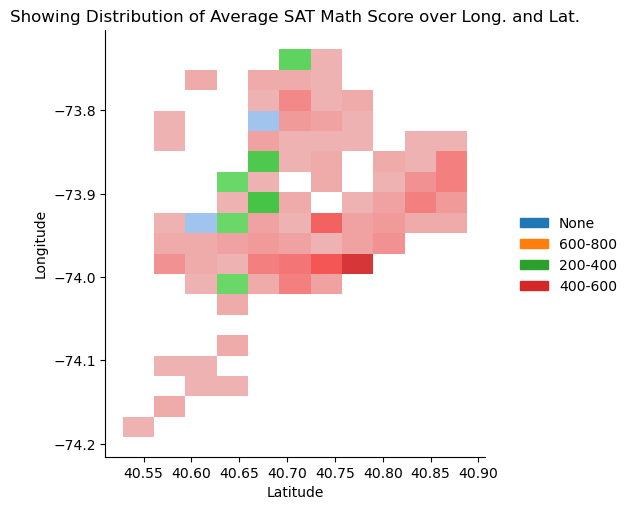

<Figure size 200x200 with 0 Axes>

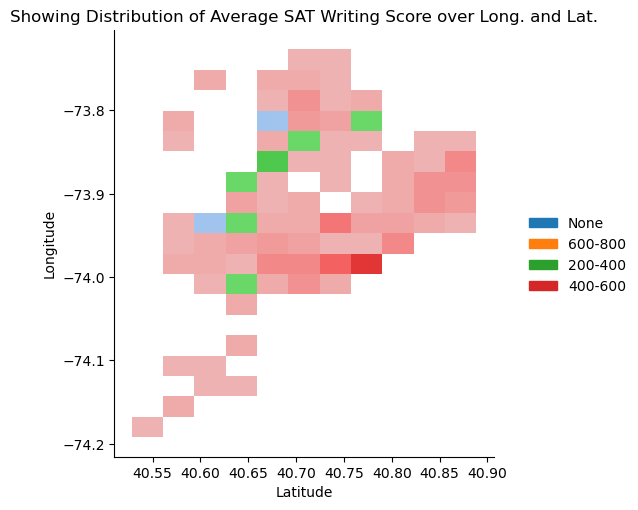

<Figure size 200x200 with 0 Axes>

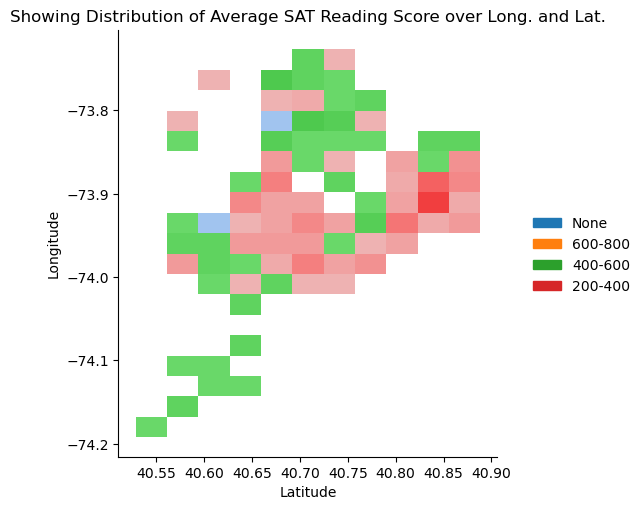

In [5]:
plt.figure(figsize=(2, 2))
sns.displot(df, x="Latitude", y="Longitude", hue=binning(df, "Average Score (SAT Math)"))
plt.title("Showing Distribution of Average SAT Math Score over Long. and Lat.")
plt.show()

plt.figure(figsize=(2, 2))
sns.displot(df, x="Latitude", y="Longitude", hue=binning(df, "Average Score (SAT Writing)"))
plt.title("Showing Distribution of Average SAT Writing Score over Long. and Lat.")
plt.show()

plt.figure(figsize=(2, 2))
sns.displot(df, x="Latitude", y="Longitude", hue=binning(df, "Average Score (SAT Reading)"))
plt.title("Showing Distribution of Average SAT Reading Score over Long. and Lat.")
plt.show()

### Using Percentage of Ethnicities in Schools to Create a Metric of Representation

Each school has a given percentage of white, black, hispanic and asian people. This means that the most equal distribution numerically would be 25% for each. Using this baseline, the amount of variance from this equal distibution is calculated and the average variance is used as a metric to measure how much equal representation of ethnicities there are in each school.

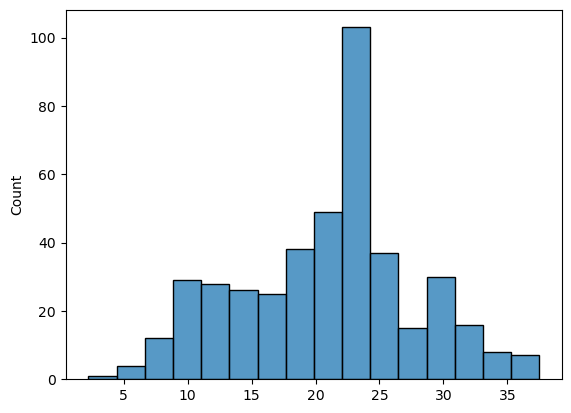

In [6]:
import statistics

def vary(df):

    variance = []

    for x in range(len(df["Percent White"])):
        cols = ["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]
        l = []
        for y in cols:
            l.append(float(str(df.at[x, y]).replace("%", "")))
    
        norm = 100/len(l)
        newl = []
        for z in l:
            newl.append(abs(norm-z))
    
        variance.append(statistics.mean(newl))
        
    return variance

sns.histplot(x=vary(df))
plt.show()
    
df["diversityIndex"] = vary(df)


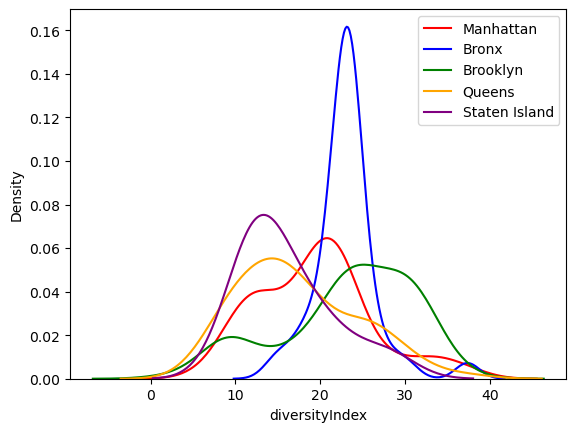

In [7]:
sns.kdeplot(df[df['Borough']=="Manhattan"]['diversityIndex'], color="red", label="Manhattan",)
sns.kdeplot(df[df['Borough']=="Bronx"]['diversityIndex'], color="blue", label="Bronx",)
sns.kdeplot(df[df['Borough']=="Brooklyn"]['diversityIndex'], color="green", label="Brooklyn",)
sns.kdeplot(df[df['Borough']=="Queens"]['diversityIndex'], color="orange", label="Queens",)
sns.kdeplot(df[df['Borough']=="Staten Island"]['diversityIndex'], color="purple", label="Staten Island",)
plt.legend()
plt.show()

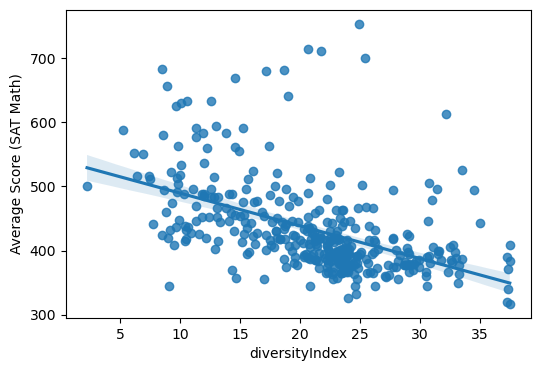

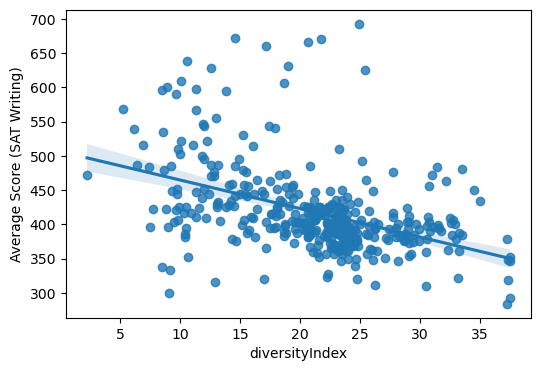

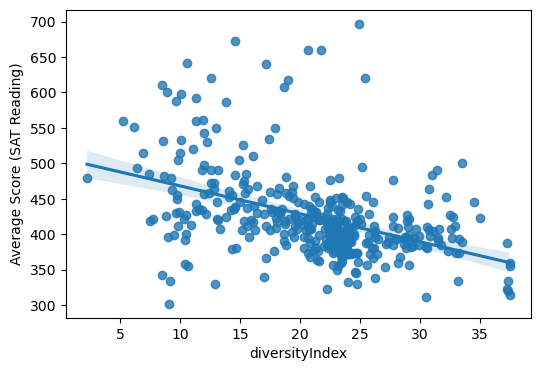

In [8]:
plt.figure(figsize=(6, 4))
sns.regplot(x = df["diversityIndex"], y = df["Average Score (SAT Math)"])
plt.show()
plt.figure(figsize=(6, 4))
sns.regplot(x = df["diversityIndex"], y = df["Average Score (SAT Writing)"])
plt.show()
plt.figure(figsize=(6, 4))
sns.regplot(x = df["diversityIndex"], y = df["Average Score (SAT Reading)"])
plt.show()

### Exploring the Effect of Types of Instituions and School's Association with People and Places Through the Name of the Schools

Using natural language processing, the name of the schools can be tokenized to see which kinds of words and nouns are associated with the highest scores on the SAT.

NOTE: can also see the correlation with the diversity index

In [12]:
df = pd.read_csv("scores.csv")

df = df.replace('nan', None)

df = df.dropna()

df = df.reset_index()

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def vocabGen(df):

    vocab = {}

    for i in range(df.shape[0]):
    
        tokenizer = RegexpTokenizer(r'\w+')
    
        text_tokens = tokenizer.tokenize(df["School Name"][i])

        tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

        for j in tokens_without_sw:
            if j not in list(vocab.keys()):
                vocab[j] = 0


    for i in list(vocab.keys()):
        count = 0
        for j in range(df.shape[0]):
            if i in df["School Name"][j]:
                vocab[i] += df["Average Score (SAT Math)"][j] + df["Average Score (SAT Reading)"][j] + df["Average Score (SAT Writing)"][j]
                count+=1
        vocab[i] = vocab[i]/count
        
    return vocab
    
    
vocab1 = sorted((value,key) for (key,value) in vocabGen(df).items())

vocab = vocabGen(df)

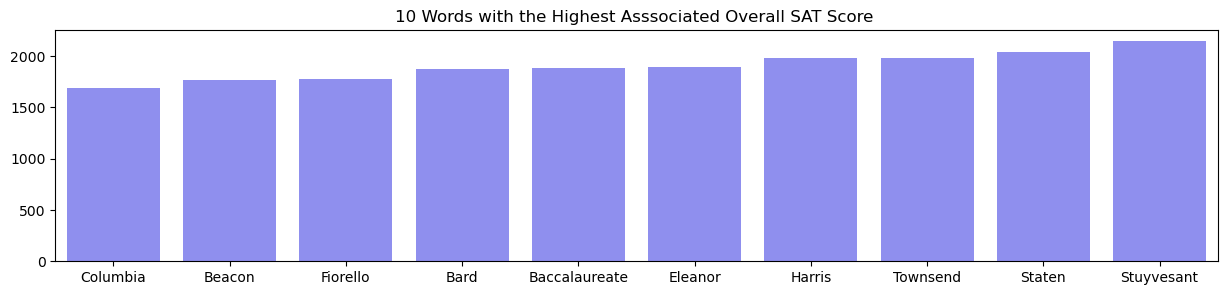

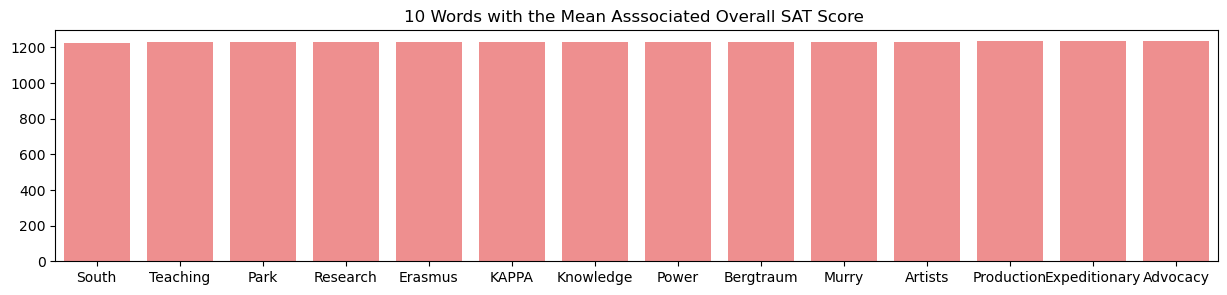

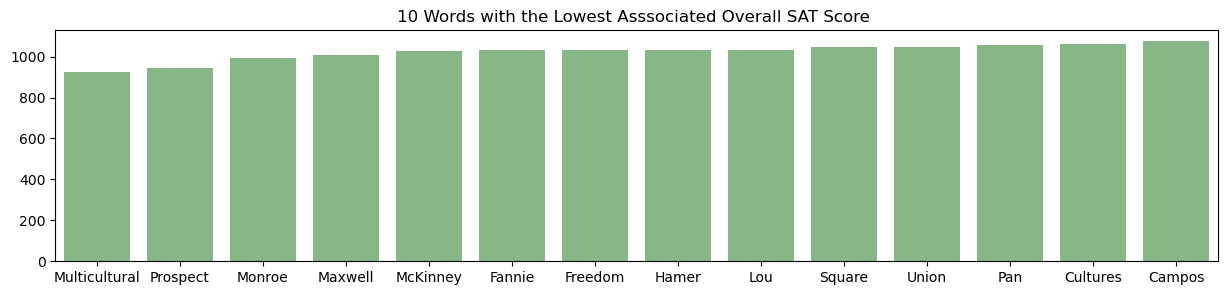

In [15]:
arrs = np.array(vocab1)[434:444,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="blue", alpha=0.5)
plt.title("10 Words with the Highest Asssociated Overall SAT Score ")
plt.show()

arrs = np.array(vocab1)[200:214,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="red", alpha=0.5)
plt.title("10 Words with the Mean Asssociated Overall SAT Score ")
plt.show()

arrs = np.array(vocab1)[0:14,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="green", alpha=0.5)
plt.title("10 Words with the Lowest Asssociated Overall SAT Score ")
plt.show()


#### Grouping Vocab Words by Quartiles of the Total SAT Score

Doing this can help us create one hot vectors that encode the schools average SAT score into the words in their name. Each quartile will be assigned its own vocabulary and if a school's name has a word in one of the vocabs, it will posses a value of 1 for that quartile and 0 if not. A encoded vector will look like this:

[0,1,0,1]

with each index of the vector representing words in one of the quartiles.

[1157.0, 1226.0, 1327.0]


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


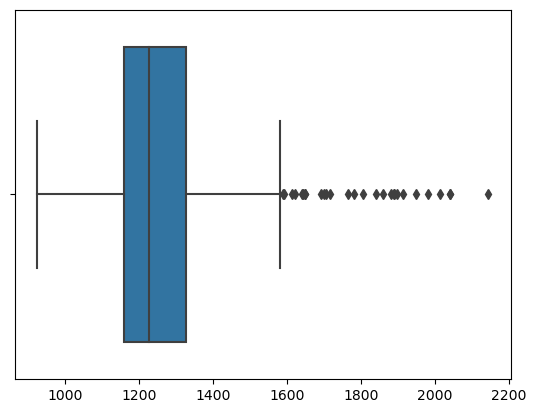

In [16]:
sns.boxplot(df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"])

a = np.array(df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"])
p = [np.percentile(a, 25), np.percentile(a, 50), np.percentile(a, 75)] 
print(p)

In [17]:
def quartileBin(vocab):

    pWords = {0:[], 1:[], 2:[], 3:[]}

    for i in vocab.keys():
        if float(vocab[i]) < 1157:
            pWords[0].append(i)
        elif float(vocab[i]) >= 1157 and float(vocab[i]) < 1226:
            pWords[1].append(i)
        elif float(vocab[i]) >= 1226 and float(vocab[i]) < 1327:
            pWords[2].append(i)
        elif float(vocab[i]) >= 1327:
            pWords[3].append(i)
            
    return pWords

In [18]:
def oneHotVectors(pWords):

    p0 = []
    p1 = []
    p2 = []
    p3 = []

    for i in range(df.shape[0]):
        if any(item in pWords[0] for item in df["School Name"][i].split(" ")):
            p0.append(1)
        else:
            p0.append(0)
        if any(item in pWords[1] for item in df["School Name"][i].split(" ")):
            p1.append(1)
        else:
            p1.append(0)
        if any(item in pWords[2] for item in df["School Name"][i].split(" ")):
            p2.append(1)
        else:
            p2.append(0)
        if any(item in pWords[3] for item in df["School Name"][i].split(" ")):
            p3.append(1)
        else:
            p3.append(0)
            
    return p0, p1, p2, p3

In [19]:
p0, p1, p2, p3 = oneHotVectors(quartileBin(vocab))

df["p0"] = p0
df["p1"] = p1
df["p2"] = p2
df["p3"] = p3

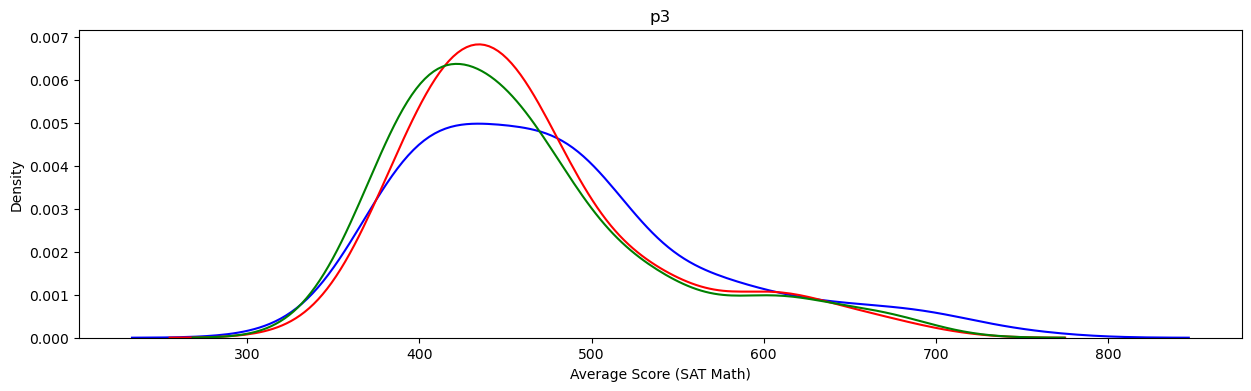

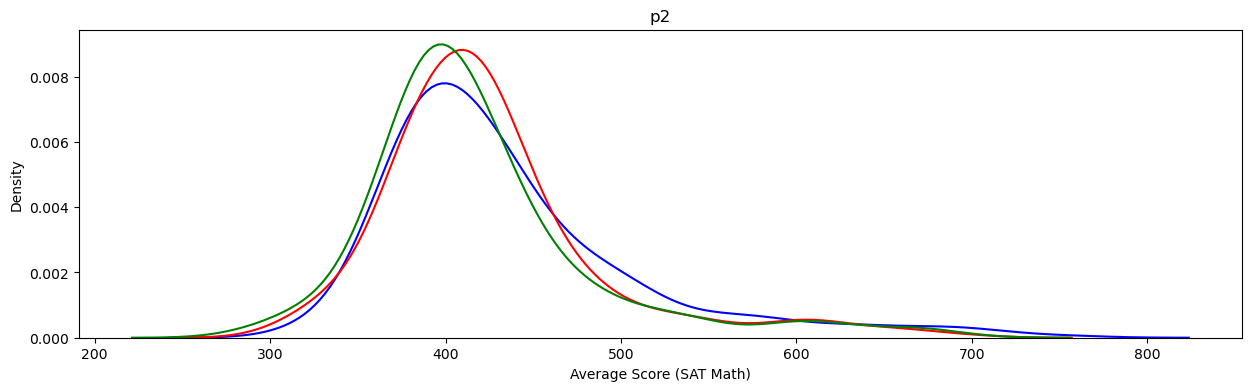

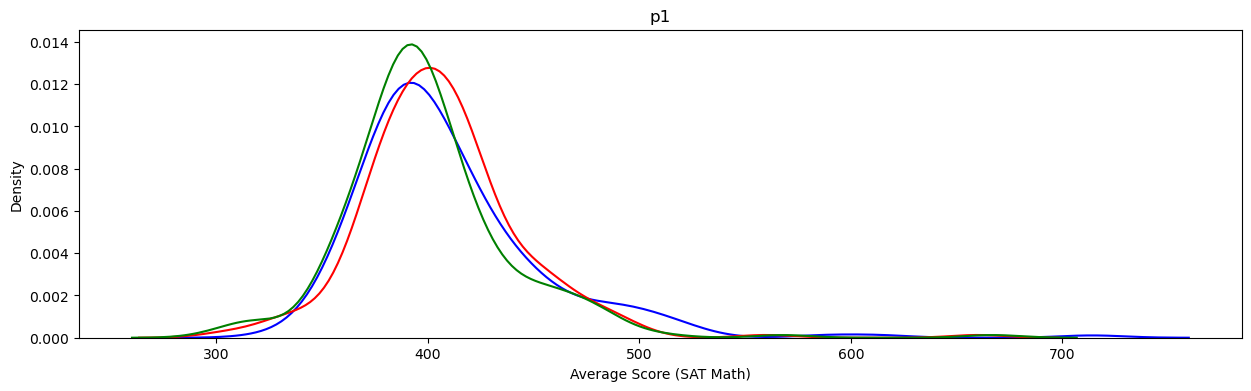

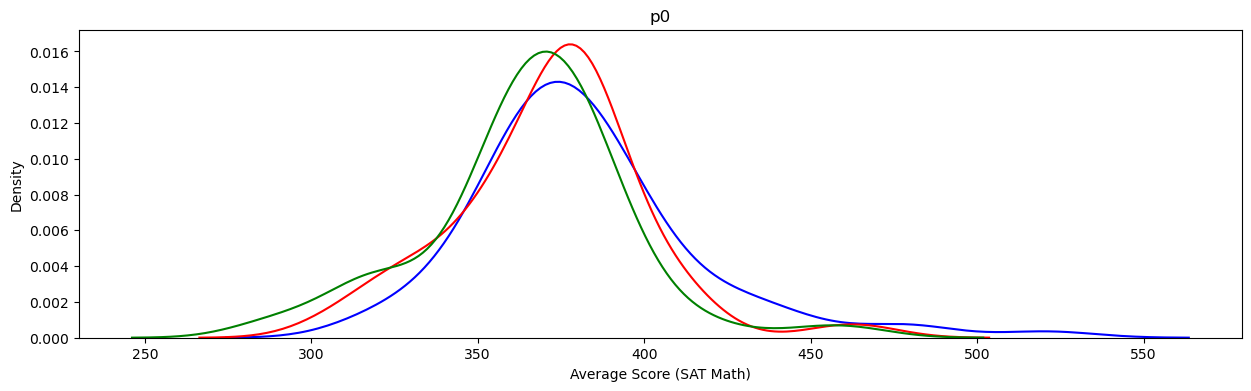

In [20]:
plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p3']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['p3']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['p3']==1]['Average Score (SAT Writing)'], color="green")
plt.title("p3")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p2']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['p2']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['p2']==1]['Average Score (SAT Writing)'], color="green")
plt.title("p2")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p1']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['p1']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['p1']==1]['Average Score (SAT Writing)'], color="green")
plt.title("p1")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p0']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['p0']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['p0']==1]['Average Score (SAT Writing)'], color="green")
plt.title("p0")
plt.show()
    

In [21]:
def sumSAT(df):

    totalScore = df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"]
    
    return totalScore

df["totalScore"] = sumSAT(df)

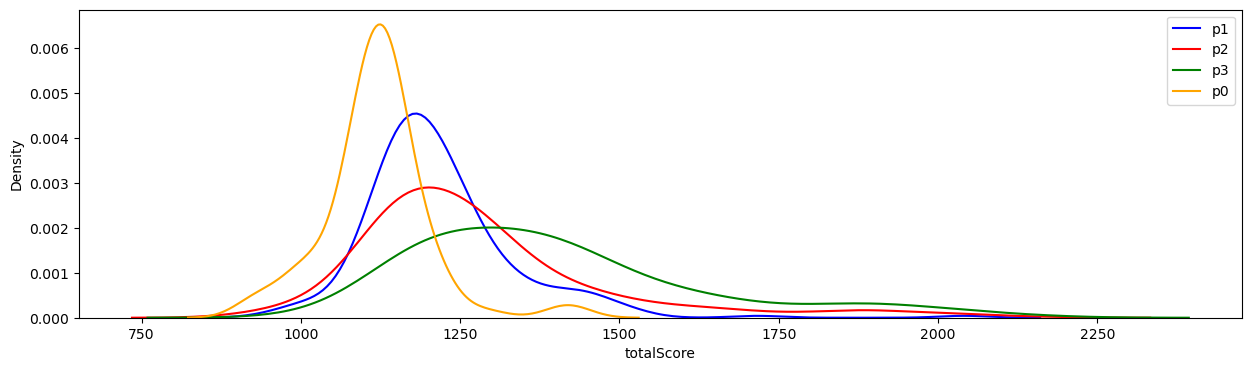

In [22]:
plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p1']==1]['totalScore'], color = "blue", label="p1")
sns.kdeplot(df[df['p2']==1]['totalScore'], color="red", label="p2")
sns.kdeplot(df[df['p3']==1]['totalScore'], color="green", label="p3")
sns.kdeplot(df[df['p0']==1]['totalScore'], color="orange", label="p0")
plt.legend()
plt.show()

### Formatting Different Types of Data in the Columns of the Dataframe

In [23]:
#Formatting percentage

def removePercentage(df):
    newdf = [] 
    for i in df:
        newdf.append(float(i.split("%")[0]))
        
    return newdf

df["Percent Tested"] = removePercentage(df["Percent Tested"])
    

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diversityIndex', ylabel='Percent Tested'>

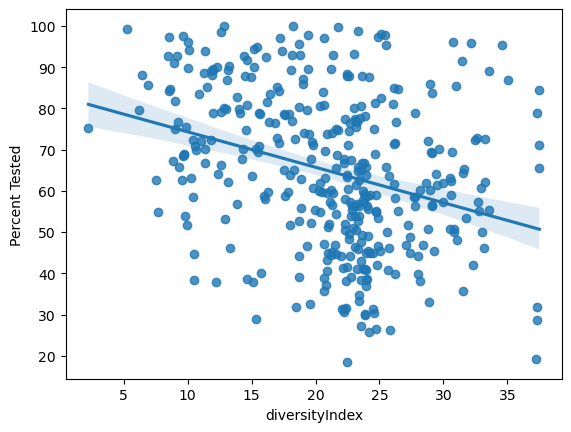

In [24]:
df["diversityIndex"] = vary(df)

sns.regplot(df["diversityIndex"], df["Percent Tested"])

In [25]:
def time(df):
    slist = [] 
    elist = []
    for i in range(len(df["Start Time"])):
        i = df["Start Time"][i]
        i = i.split(" ")
        if i[1] == "AM":
            i = i[0].split(":")
            slist.append(int(i[0]+i[1]))
        elif i[1] == "PM":
            i = i[0].split(":")
            slist.append(int(i[0]+i[1])+1200)
    for i in range(len(df["End Time"])):
        i = df["End Time"][i]
        i = i.split(" ")
        if i[1] == "AM":
            i = i[0].split(":")
            elist.append(int(i[0]+i[1]))
        elif i[1] == "PM":
            i = i[0].split(":")
            elist.append(int(i[0]+i[1])+1200)
    slist = np.array(slist)
    elist = np.array(elist)
    difflist = elist-slist
                         
    return difflist
                         

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


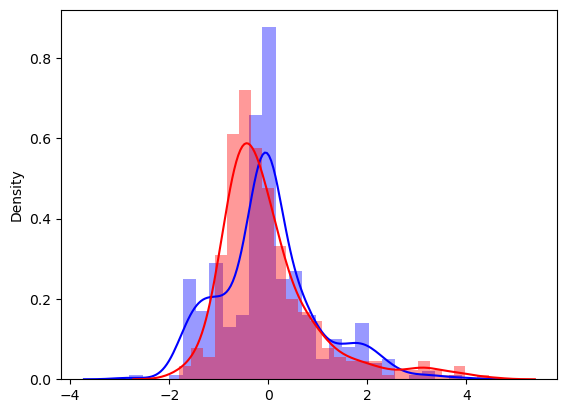

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sns.distplot(scaler.fit_transform(time(df).reshape(-1,1)), color="blue")
sns.distplot(scaler.fit_transform(np.array(df["totalScore"]).reshape(-1,1)), color="red")
plt.show()

In [27]:
df["time"] = time(df)

In [28]:
def removePercent(df):
    l = []
    for x in range(len(df["Percent Tested"])):
        l.append(float(str(df["Percent Tested"][x]).replace("%", "")))
        
    return l

df["Percent Tested"] = removePercent(df)

# Data Preprocessing

In [29]:
df.columns

Index(['index', 'School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'p0', 'p1', 'p2', 'p3',
       'totalScore', 'diversityIndex', 'time'],
      dtype='object')

#### Deleting Unrequired Features

In [30]:
del df["School ID"]
del df["School Name"]
del df["Building Code"]
del df["Street Address"]
del df["City"]
del df["State"]
del df["Zip Code"]
del df["Phone Number"]
del df["Start Time"]
del df["End Time"]
del df["Percent White"]
del df["Percent Black"]
del df["Percent Hispanic"]
del df["Percent Asian"]

In [31]:
df.dtypes

index                            int64
Borough                         object
Latitude                       float64
Longitude                      float64
Student Enrollment             float64
Average Score (SAT Math)       float64
Average Score (SAT Reading)    float64
Average Score (SAT Writing)    float64
Percent Tested                 float64
p0                               int64
p1                               int64
p2                               int64
p3                               int64
totalScore                     float64
diversityIndex                 float64
time                             int32
dtype: object

#### Encoding Borough Names into Numbers

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Manhattan", "Bronx", "Queens", "Brooklyn", "Staten Island"])
df["Borough"] = le.transform(df["Borough"])
print(df["Borough"].dtype)

int32


#### Normalizing the Data

In [33]:
from sklearn.preprocessing import MinMaxScaler

def normalize(data):
    scaler = MinMaxScaler()
    
    for i in list(data.columns):
        data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))
    
    
    return data

df = normalize(df)

print(df.head(5))

      index  Borough  Latitude  Longitude  Student Enrollment  \
0  0.000000      0.5  0.528961   0.457226            0.300283   
1  0.002315      0.5  0.523796   0.435517            0.040716   
2  0.004630      0.5  0.523796   0.435517            0.045429   
3  0.006944      0.5  0.523796   0.435517            0.051649   
4  0.009259      0.5  0.515161   0.444695            0.021301   

   Average Score (SAT Math)  Average Score (SAT Reading)  \
0                  0.778032                     0.756962   
1                  0.178490                     0.275949   
2                  0.231121                     0.318987   
3                  0.677346                     0.382278   
4                  0.212815                     0.263291   

   Average Score (SAT Writing)  Percent Tested   p0   p1   p2   p3  \
0                     0.775061        0.889571  0.0  0.0  1.0  1.0   
1                     0.251834        0.741104  0.0  1.0  0.0  0.0   
2                     0.320293        

#### Correlations in the Dataset

<AxesSubplot:>

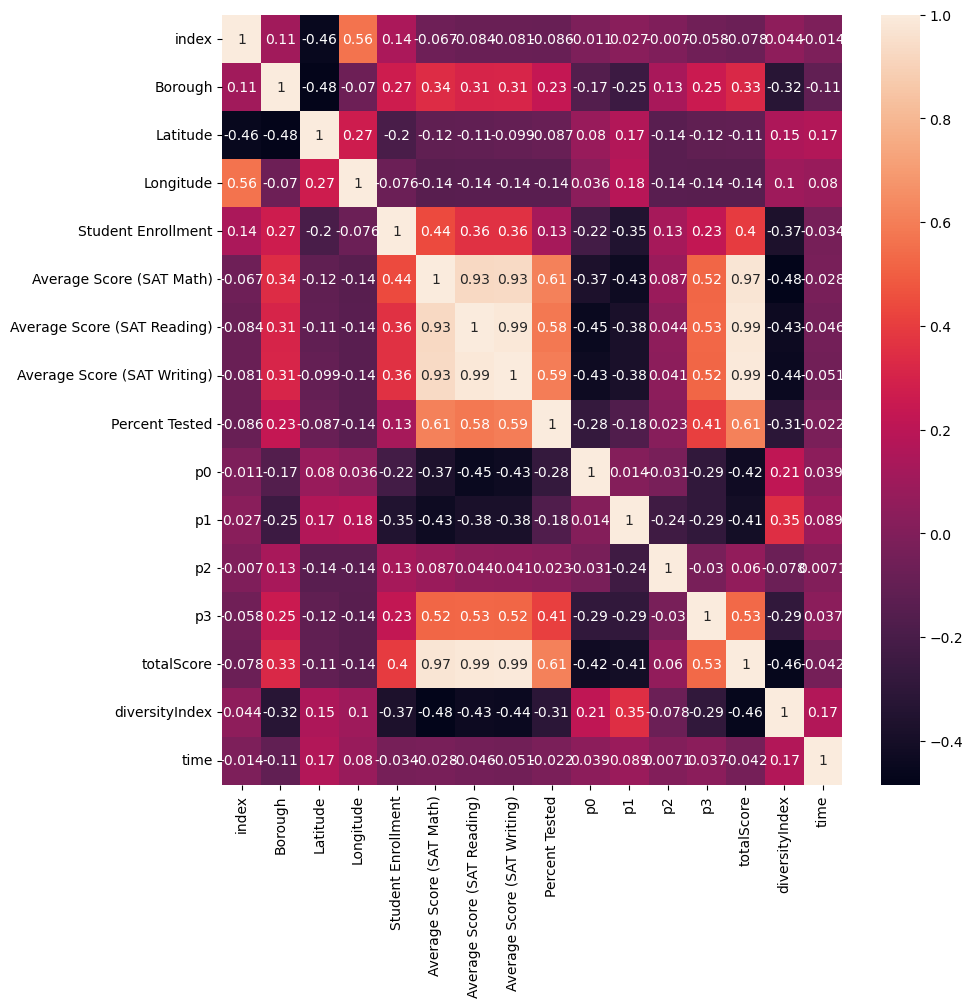

In [34]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [35]:
import sklearn.model_selection as sk 

targets = df["totalScore"]

df.drop('totalScore', axis=1, inplace=True)

X_train,X_val,Y_train,Y_val = sk.train_test_split(df,targets,test_size = 0.1,random_state = 42, shuffle=True)

print(X_train.shape)

(336, 15)


# Machine Learning Regression Model

### Training Models

In [36]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor


#Linear Support Vector Machine
model1 = sklearn.svm.SVR(kernel='linear', degree=2)
model1.fit(X_train, Y_train)
preds1 = model1.predict(X_val)


#Gaussian Support Vector Machine
model2 = sklearn.svm.SVR(kernel='rbf', degree=2)
model2.fit(X_train, Y_train)
preds2 = model2.predict(X_val)

#Ridge Regression
model3 = sklearn.linear_model.Ridge(alpha=1.0)
model3.fit(X_train, Y_train)
preds3 = model3.predict(X_val)

#Linear Regression
model4 = sklearn.linear_model.LinearRegression()
model4.fit(X_train, Y_train)
preds4 = model4.predict(X_val)

#Random Forest Regressor
model5 = RandomForestRegressor(n_estimators=15, random_state=1)
model5.fit(X_train, Y_train)
preds5 = model5.predict(X_val)

#K Neighbour Regressor
model6 = KNeighborsRegressor()
model6.fit(X_train, Y_train)
preds6 = model6.predict(X_val)

#Ensemble Regressor:

er = VotingRegressor([('RDG', model3), ('LR', model4), ("RFR", model5)])
predsER = er.fit(X_train, Y_train).predict(X_val)



#### Graphing Mean Squared Error of Models on Validation Data

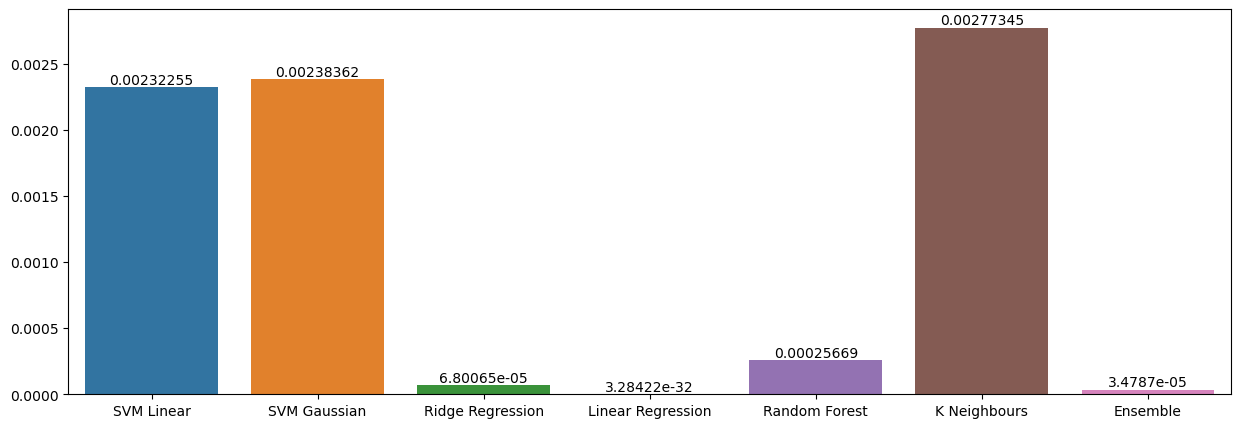

In [37]:
a = [np.sum(np.power((np.array(preds1)-np.array(Y_val)),2))/len(preds1),
     np.sum(np.power((np.array(preds2)-np.array(Y_val)),2))/len(preds2),
     np.sum(np.power((np.array(preds3)-np.array(Y_val)),2))/len(preds3),
     np.sum(np.power((np.array(preds4)-np.array(Y_val)),2))/len(preds4),
     np.sum(np.power((np.array(preds5)-np.array(Y_val)),2))/len(preds5),
     np.sum(np.power((np.array(preds6)-np.array(Y_val)),2))/len(preds6),
     np.sum(np.power((np.array(predsER)-np.array(Y_val)),2))/len(predsER)]

l = ["SVM Linear", "SVM Gaussian", "Ridge Regression", "Linear Regression", "Random Forest", "K Neighbours", "Ensemble"]

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=l, y=a)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### Feature Importance Analysis

Trying to find which socioeconomic features affect the total SAT score the most in order to find what kinds of inequalties result in differing educational outcomes. In order to do the feature analysis, the coeffecients for each feature was extracted from the model and compared to see which had the highest coeffecient or the greatest impact on the model

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


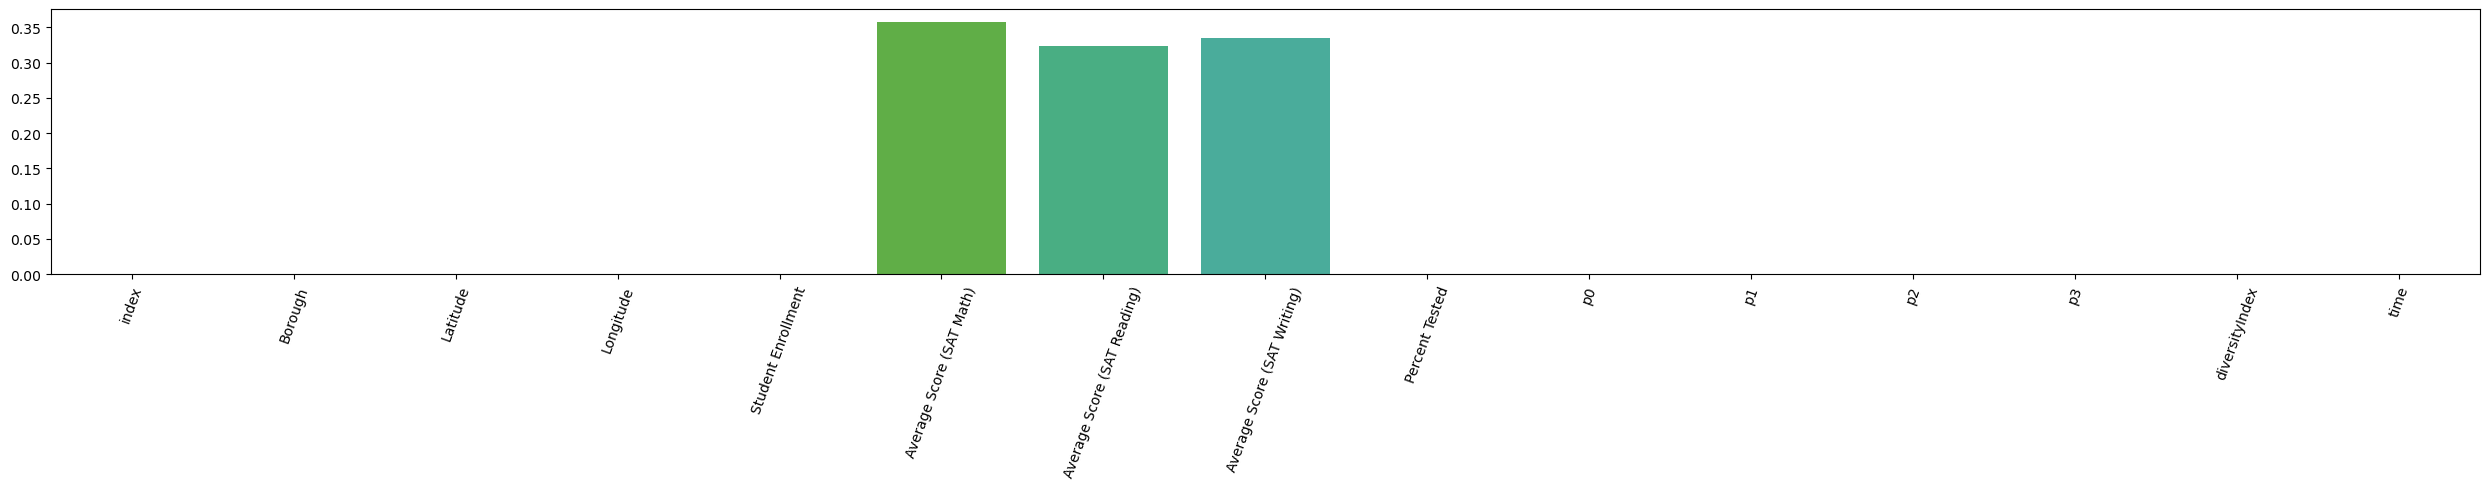

In [38]:
# Features of Linear Regression (Least Error)

importance = model4.coef_

m = []
n = []

for i,j in enumerate(importance):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
sns.barplot(m,n)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


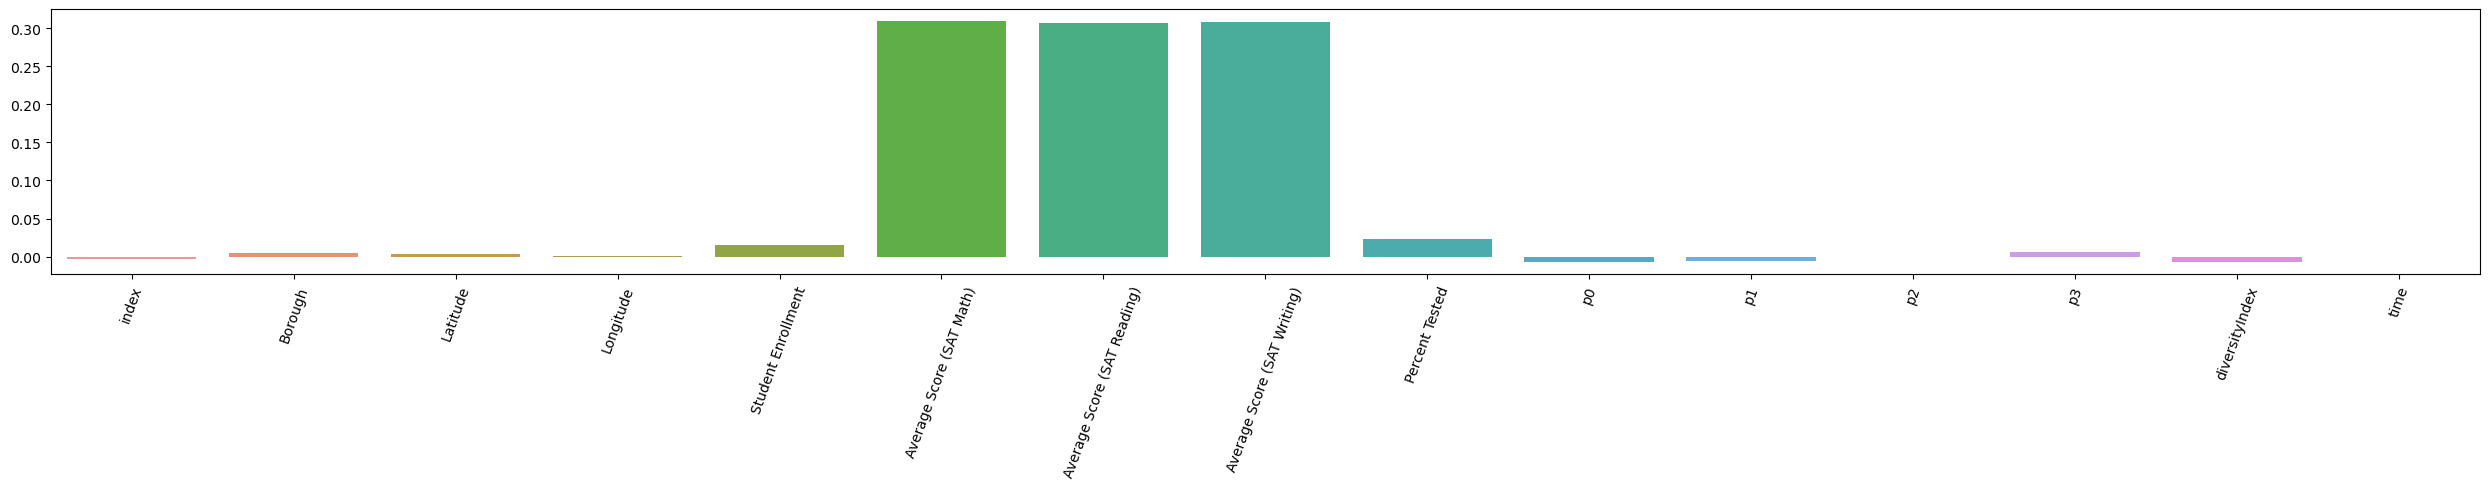

In [39]:
#Importance of Ridge Regression (2nd lowest error)

importance = model3.coef_

m = []
n = []

for i,j in enumerate(importance):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
sns.barplot(m,n)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

As seen above, the split up SAT scores are the most correlated with the SAT scores inherently therefore they are not of a lot of use in finding out the effects of the other features and their effect on the y variable, therefore, another regression analysis will be conducted on a dataset without the constituent SAT data. An interesting pattern is that the SAT math score has a greater effect on the total score than the writing or the reading therefore showing consistancy in the reading and writing scores throughout all the schools but a greatly differing performance on the math section of the exam.

# Machine Learning Regression Model without Constituent SAT Scores

#### Correlations and Deleting Features

In [40]:
del df["Average Score (SAT Math)"]
del df["Average Score (SAT Reading)"]
del df["Average Score (SAT Writing)"]
del df["index"]

<AxesSubplot:>

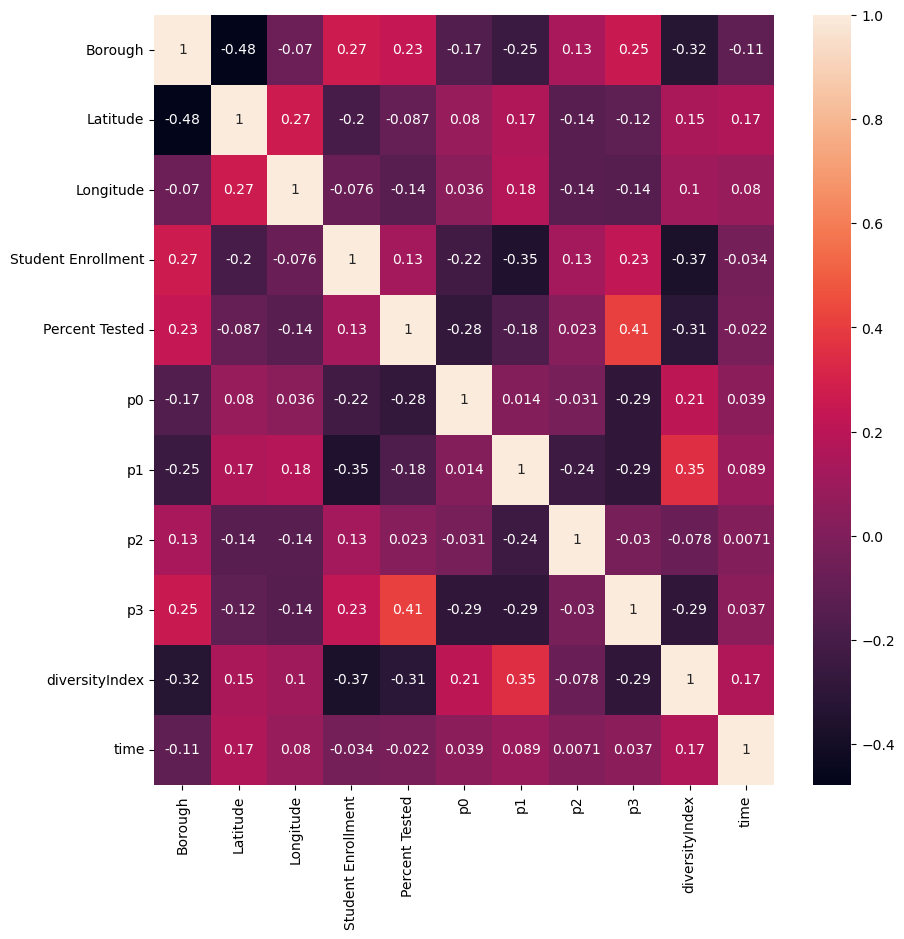

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [42]:
import sklearn.model_selection as sk 

X_train,X_val,Y_train,Y_val = sk.train_test_split(df,targets,test_size = 0.1,random_state = 42, shuffle=True)

print(X_train.shape)

(336, 11)


### Training Models

In [43]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor


#Linear Support Vector Machine
model1 = sklearn.svm.SVR(kernel='linear', degree=2)
model1.fit(X_train, Y_train)
preds1 = model1.predict(X_val)


#Gaussian Support Vector Machine
model2 = sklearn.svm.SVR(kernel='rbf', degree=2)
model2.fit(X_train, Y_train)
preds2 = model2.predict(X_val)

#Ridge Regression
model3 = sklearn.linear_model.Ridge(alpha=1.0)
model3.fit(X_train, Y_train)
preds3 = model3.predict(X_val)

#Linear Regression
model4 = sklearn.linear_model.LinearRegression()
model4.fit(X_train, Y_train)
preds4 = model4.predict(X_val)

#Random Forest Regressor
model5 = RandomForestRegressor(n_estimators=15, random_state=1)
model5.fit(X_train, Y_train)
preds5 = model5.predict(X_val)

#K Neighbour Regressor
model6 = KNeighborsRegressor()
model6.fit(X_train, Y_train)
preds6 = model6.predict(X_val)

#Ensemble Regressor:

er = VotingRegressor([('SVMG', model2), ('RF', model5)])
predsER = er.fit(X_train, Y_train).predict(X_val)

#### Mean Squared Error Analysis

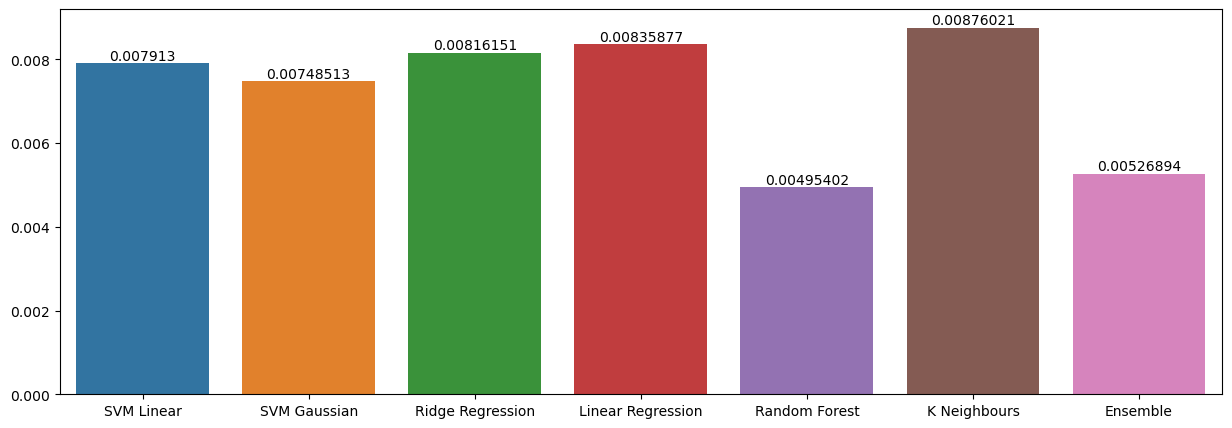

In [44]:
a = [np.sum(np.power((np.array(preds1)-np.array(Y_val)),2))/len(preds1),
     np.sum(np.power((np.array(preds2)-np.array(Y_val)),2))/len(preds2),
     np.sum(np.power((np.array(preds3)-np.array(Y_val)),2))/len(preds3),
     np.sum(np.power((np.array(preds4)-np.array(Y_val)),2))/len(preds4),
     np.sum(np.power((np.array(preds5)-np.array(Y_val)),2))/len(preds5),
     np.sum(np.power((np.array(preds6)-np.array(Y_val)),2))/len(preds6),
     np.sum(np.power((np.array(predsER)-np.array(Y_val)),2))/len(predsER)]

l = ["SVM Linear", "SVM Gaussian", "Ridge Regression", "Linear Regression", "Random Forest", "K Neighbours", "Ensemble"]

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=l, y=a)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### Feature Analysis

In order to do the feature analysis, the coeffecients for each feature was extracted from the model and compared to see which had the highest coeffecient or the greatest impact on the model

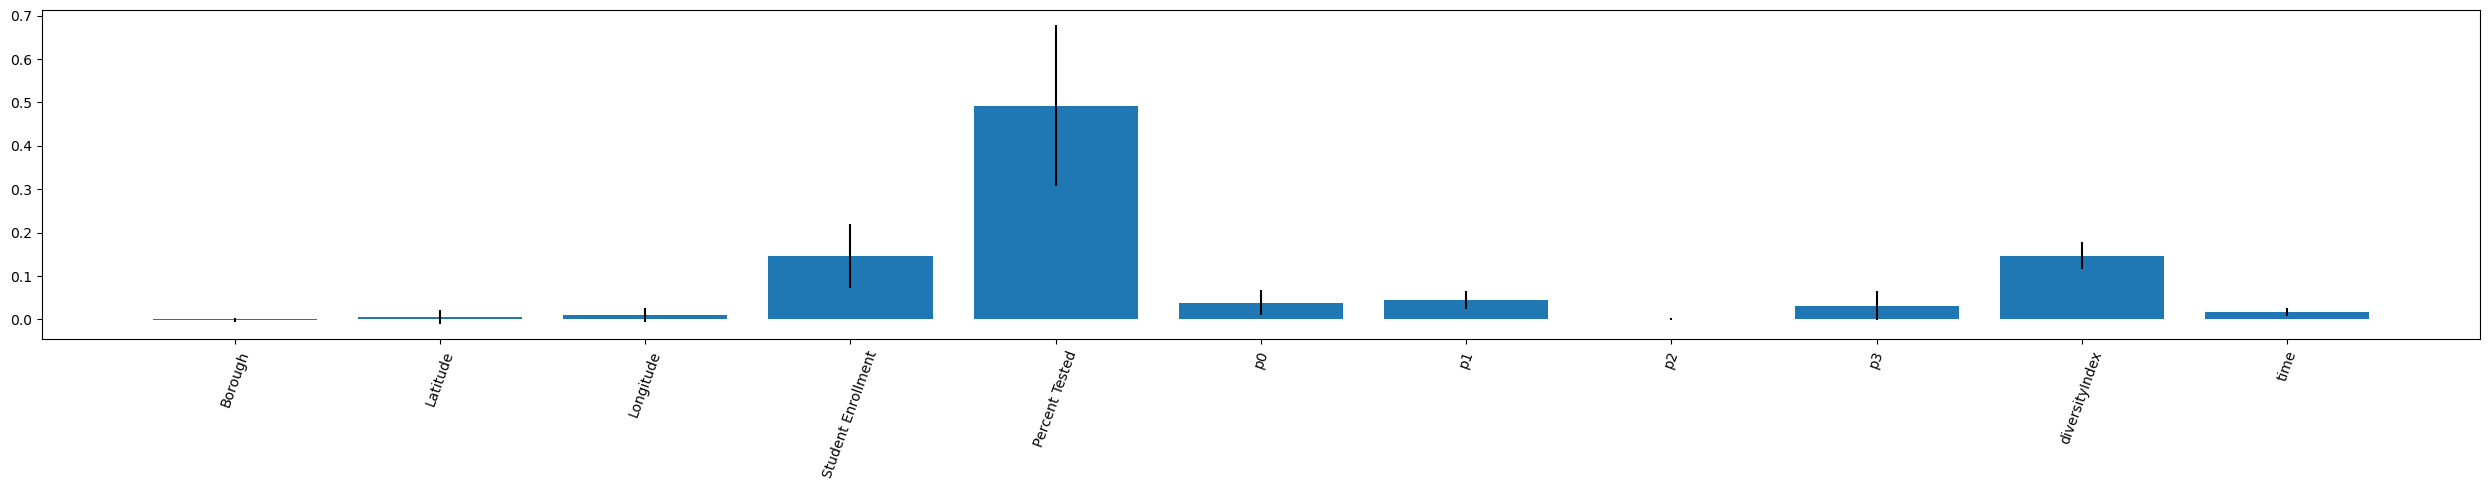

In [45]:
#Random Forest (Sample for Lowest Error without Ensemble)

from sklearn.inspection import permutation_importance

result = permutation_importance(model5, X_val, Y_val, n_repeats=10, random_state=42, n_jobs=2)

m = []
n = []

for i,j in enumerate(result.importances_mean):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
plt.bar(x=m,height=n, yerr=result.importances_std)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


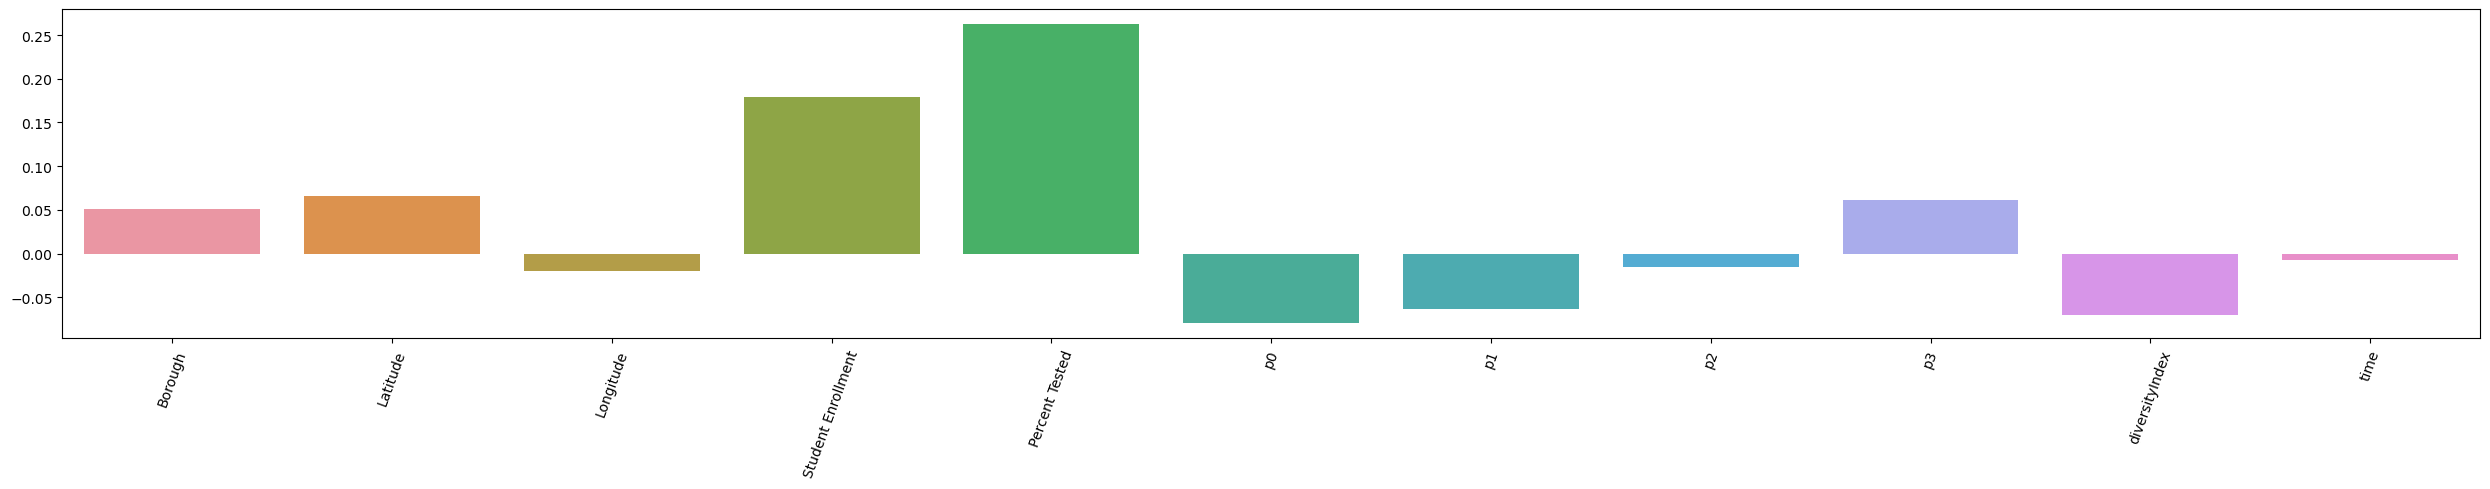

In [46]:
# Linear Regression (Sample For High Error)

importance = model4.coef_

m = []
n = []

for i,j in enumerate(importance):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
sns.barplot(m,n)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


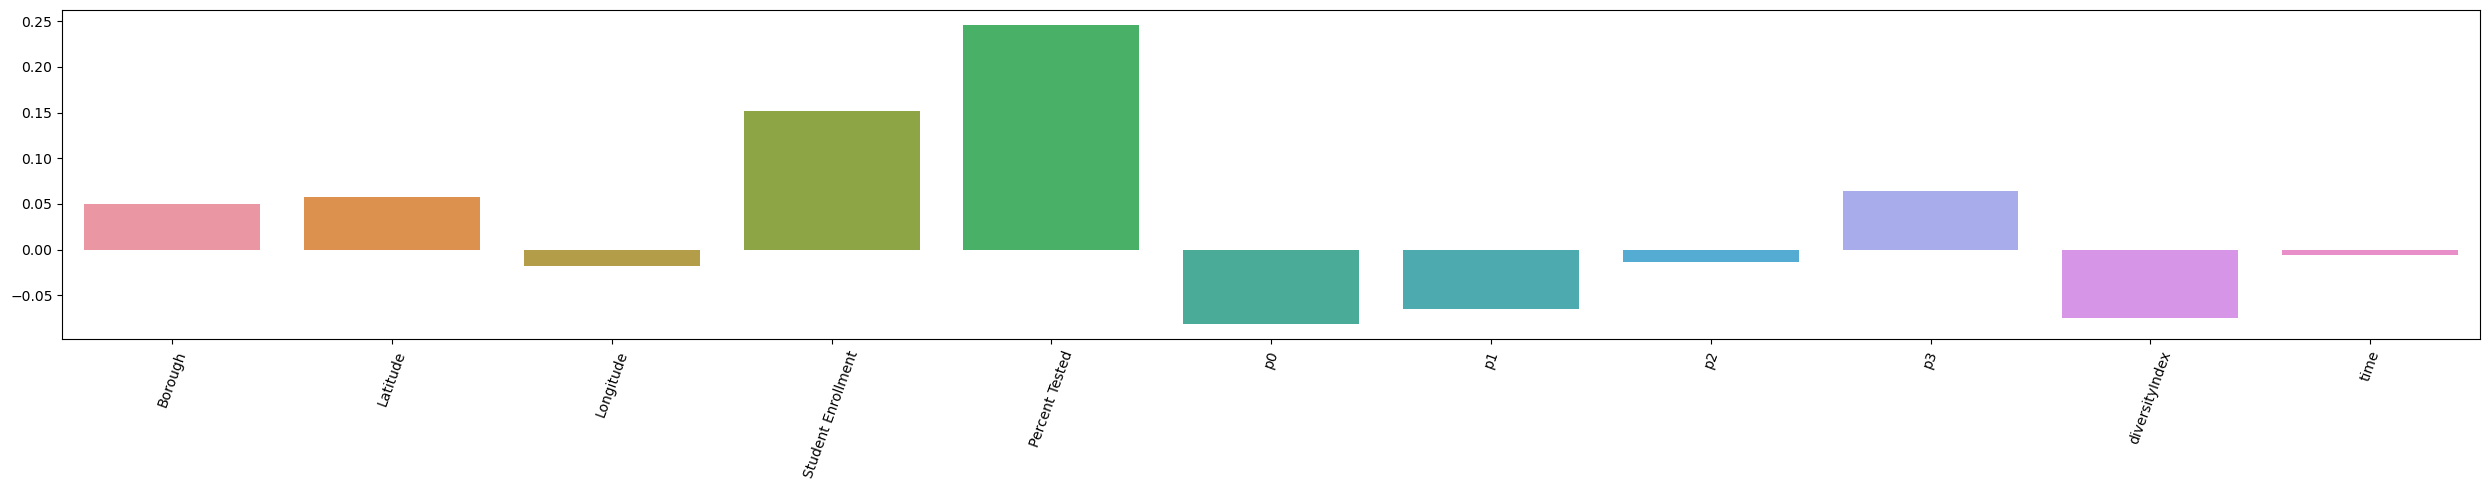

In [47]:
# Ridge Regression (Sample for Higher Error)
importance = model3.coef_

m = []
n = []

for i,j in enumerate(importance):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
sns.barplot(m,n)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()